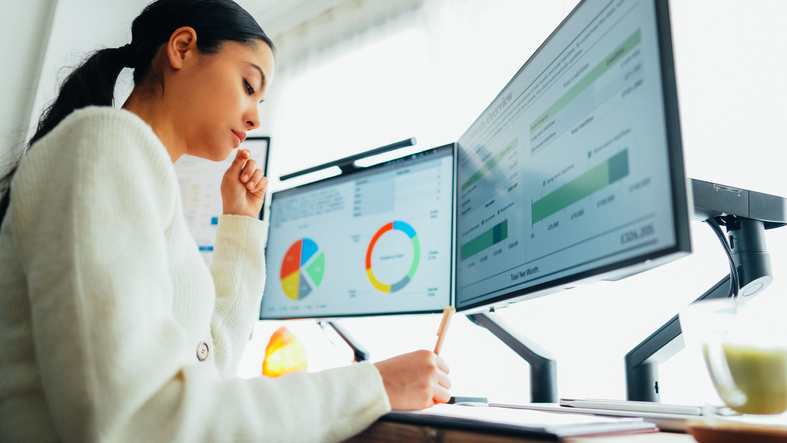

**AZ Watch** is a popular video streaming platform specialized in educational content, where creators publish online video tutorials and lessons about any topic, from speaking a new language to cooking to learning to play a musical instrument.

Their next goal is to leverage AI-driven solutions to analyze and make predictions about their subscribers and improve their marketing strategy around attracting new subscribers and retaining current ones. This project uses machine learning to predict subscribers likely to churn and find customer segments. This may help AZ Watch find interesting usage patterns to build subscriber personas in future marketing plans!


The `data/AZWatch_subscribers.csv` **dataset** contains information about subscribers and their status over the last year:

|Column name|Description|
|-----------|-----------|
|`subscriber_id`|The unique identifier of each subscriber user|
|`age_group`|The subscriber's age group|
|`engagement_time`|Average time (in minutes) spent by the subscriber per session|
|`engagement_frequency`|Average weekly number of times the subscriber logged in the platform (sessions) over a year period|
|`subscription_status`|Whether the user remained subscribed to the platform by the end of the year period (subscribed), or unsubscribed and terminated her/his services (churned)|


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.cluster import KMeans
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
file_path = '/content/AZWatch_subscribers.csv'
df = pd.read_csv(file_path)
print(df.head())

   subscriber_id    age_group  engagement_time  engagement_frequency  \
0          14451        18-34             5.55                     7   
1          18386     under 18             5.12                    12   
2          12305  35 and over             4.25                     4   
3          17546        18-34             8.54                    15   
4          15399        18-34            12.12                    20   

  subscription_status  
0          subscribed  
1          subscribed  
2             churned  
3          subscribed  
4          subscribed  


Summary Statistics

In [ ]:
df.describe()

,subscriber_id,engagement_time,engagement_frequency
count,1000.000000,1000.000000,1000.000000
mean,15024.803000,6.180030,9.978000
std,2927.044957,2.757166,6.236859
min,10000.000000,0.220000,0.000000
25%,12452.500000,3.917500,5.000000
50%,15184.000000,6.000000,8.000000
75%,17481.250000,8.110000,15.000000
max,19976.000000,16.980000,45.000000


**Exploratory Data Anlaysis**

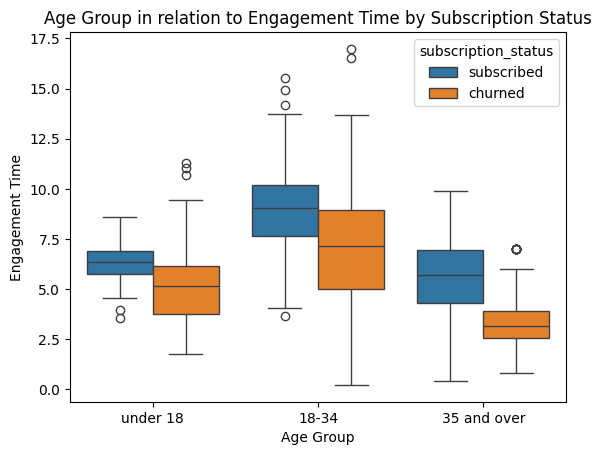

In [ ]:
sns.boxplot(data= df, x= 'age_group', y= 'engagement_time', hue='subscription_status', order = ['under 18','18-34','35 and over'])
plt.title('Age Group in relation to Engagement Time by Subscription Status')
plt.xlabel('Age Group')
plt.ylabel('Engagement Time')
plt.show()

*Insight*

We notice that across all age groups, customers that decided to unsubscribed the services have less engagement time compared to customers that continue their subscription. In terms of age, people aged 18-34 spend more time on our services but a significant variation remains.

**Data Preprocessing**

In [ ]:
# Encode age_group and subscription_status
df_encode = pd.get_dummies(df['age_group'], dtype = float)
print(df_encode.head())

   18-34  35 and over  under 18
0    1.0          0.0       0.0
1    0.0          0.0       1.0
2    0.0          1.0       0.0
3    1.0          0.0       0.0
4    1.0          0.0       0.0


In [ ]:
df = pd.concat([df, df_encode], axis=1)
print(df.head())

   subscriber_id    age_group  engagement_time  engagement_frequency  \
0          14451        18-34             5.55                     7   
1          18386     under 18             5.12                    12   
2          12305  35 and over             4.25                     4   
3          17546        18-34             8.54                    15   
4          15399        18-34            12.12                    20   

  subscription_status  18-34  35 and over  under 18  
0          subscribed    1.0          0.0       0.0  
1          subscribed    0.0          0.0       1.0  
2             churned    0.0          1.0       0.0  
3          subscribed    1.0          0.0       0.0  
4          subscribed    1.0          0.0       0.0  


In [ ]:
df.drop('age_group', axis=1, inplace = True)
df['subscription_status'].replace({'subscribed':0, 'churned':1}, inplace = True)
print(df.head())


   subscriber_id  engagement_time  engagement_frequency  subscription_status  \
0          14451             5.55                     7                    0   
1          18386             5.12                    12                    0   
2          12305             4.25                     4                    1   
3          17546             8.54                    15                    0   
4          15399            12.12                    20                    0   

   18-34  35 and over  under 18  
0    1.0          0.0       0.0  
1    0.0          0.0       1.0  
2    0.0          1.0       0.0  
3    1.0          0.0       0.0  
4    1.0          0.0       0.0  


Check Missing Values

In [ ]:
print(df.isna().sum())

subscriber_id           0
engagement_time         0
engagement_frequency    0
subscription_status     0
18-34                   0
35 and over             0
under 18                0
dtype: int64


In [ ]:
print(df.dtypes)

subscriber_id             int64
engagement_time         float64
engagement_frequency      int64
subscription_status       int64
18-34                   float64
35 and over             float64
under 18                float64
dtype: object


What is the predicted subscriber churn for AZ Watch?

In [ ]:
X = df.drop(['subscription_status', 'subscriber_id'], axis=1)
y= df['subscription_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

1. Logistic Regression

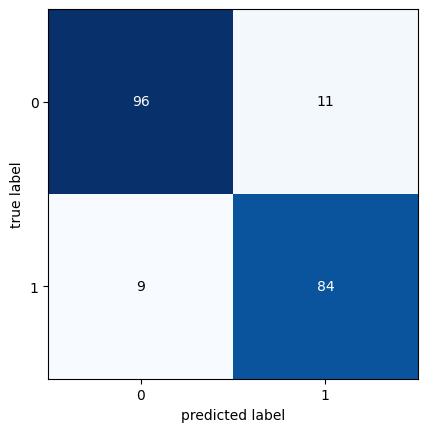

Accuracy score with logistic regression:  0.9


In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
cm_lr = confusion_matrix(y_test, y_pred_lr)
fig, ax = plot_confusion_matrix(conf_mat = cm_lr)
plt.show()
lr_score = lr.score(X_test, y_test)
print('Accuracy score with logistic regression: ', lr_score)

2. Random Forest

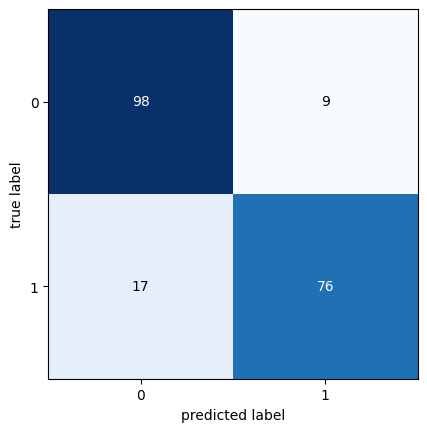

Accuracy score with random forest:  0.87


In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
cm_rf = confusion_matrix(y_test, y_pred_rf)
fig, ax = plot_confusion_matrix(conf_mat = cm_rf)
plt.show()
rf_score = rf.score(X_test, y_test)
print('Accuracy score with random forest: ', rf_score)



3. Decision Tree

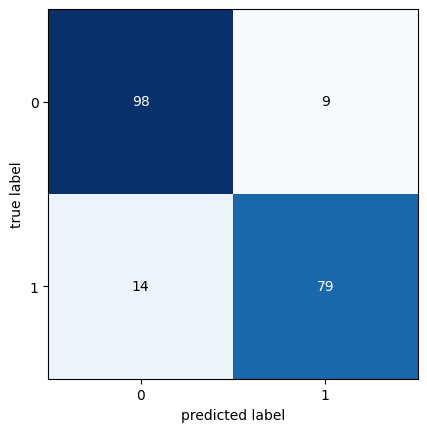

Accuracy score with decision tree:  0.885


In [ ]:
dt = RandomForestClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
cm_dt = confusion_matrix(y_test, y_pred_dt)
fig, ax = plot_confusion_matrix(conf_mat = cm_dt)
plt.show()
dt_score = dt.score(X_test, y_test)
print('Accuracy score with decision tree: ', dt_score)

As we can see, decision tree topped the list with 0.905 accuracy in predicting customer churns. Therefore, decision tree is selected as the algorithm to predict subscriber churn in our case.

**Customer Segmentation**

AZ Watch wants to establish more personalized and targeted campaigns to reduce subscriber churn.

What subscriber segments can be identified in the data to make their campaigns more targeted?

In [ ]:
scaler = StandardScaler()
scaler.fit(X)
X_normalized = scaler.transform(X)

In [ ]:
sse = {} # sum of squared errors (distances) to each cluster
for k in range(1,20):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(X_normalized)
    sse[k] = kmeans.inertia_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

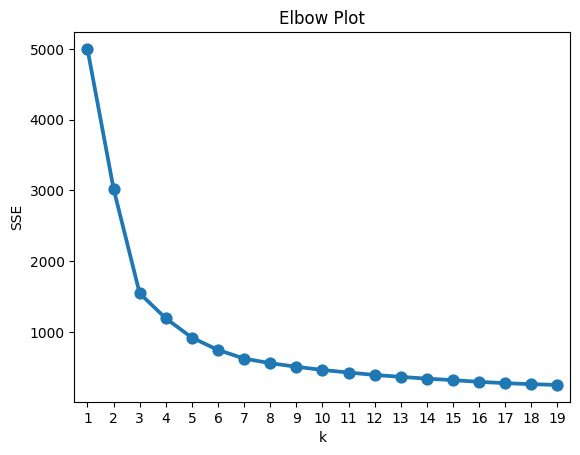

In [ ]:
plt.title('Elbow Plot')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

As the elbow plot suggests, 3 clusters is optimal for the kmeans model.

In [ ]:
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit_predict(X_normalized)
labels = kmeans.labels_
X['cluster_id'] = labels


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(X.head())

   engagement_time  engagement_frequency  18-34  35 and over  under 18  \
0             5.55                     7    1.0          0.0       0.0   
1             5.12                    12    0.0          0.0       1.0   
2             4.25                     4    0.0          1.0       0.0   
3             8.54                    15    1.0          0.0       0.0   
4            12.12                    20    1.0          0.0       0.0   

   cluster_id  
0           1  
1           0  
2           2  
3           1  
4           1  


In [ ]:
print(np.unique(labels))

[0 1 2]


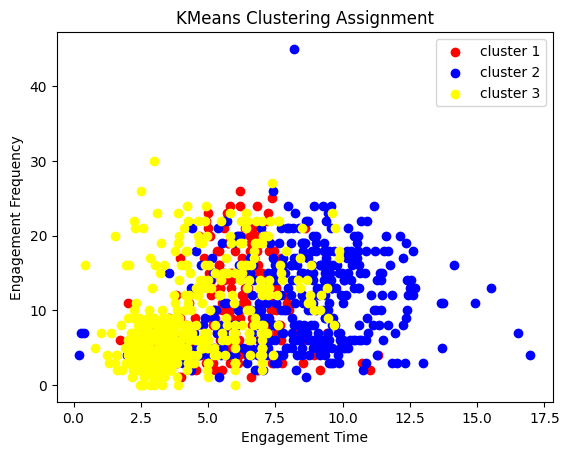

In [ ]:
label0 = X[labels == 0]
label1 = X[labels == 1]
label2 = X[labels == 2]
plt.scatter(label0.iloc[:,0] , label0.iloc[:,1] , color = 'red')
plt.scatter(label1.iloc[:,0] , label1.iloc[:,1] , color = 'blue')
plt.scatter(label2.iloc[:,0] , label2.iloc[:,1] , color = 'yellow')
plt.xlabel('Engagement Time')
plt.ylabel('Engagement Frequency')
plt.title('KMeans Clustering Assignment')
plt.legend(['cluster 1', 'cluster 2', 'cluster 3'])
plt.show()

In [ ]:
analysis = X.groupby(['cluster_id']).agg({
    'engagement_time': ['mean'],
    'engagement_frequency':['mean']
}).round(0)
analysis

,engagement_time,engagement_frequency
,mean,mean
cluster_id,,
0,6.0,10.0
1,8.0,11.0
2,4.0,9.0
